# Weight Change and Preditor-Prey Models
Sean Wade

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
from math import log
import seaborn

In [3]:
def RK4(func, y0, a, b, h, display=True):
    n = int((b-a)/h) + 1
    x = np.linspace(a,b,n)
    if isinstance(y0, (np.ndarray)):
        y = np.zeros((n,len(y0)))
    else:
        y = np.zeros(n)
    y[0] = y0
    for i in xrange(n-1):
        k1 = func(x[i], y[i])
        k2 = func(x[i] + (h/2.), y[i] + (h/2.)*k1)
        k3 = func(x[i] + (h/2.), y[i] + (h/2.)*k2)
        k4 = func(x[i+1], y[i] + h*k3)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    
    if display is True:
        plt.plot(x, y, label='RK4 with %d' % h)
    return y

In [4]:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis
beta_TEF = 0.1 # Thermic Effect of Feeding
K = 0

def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F , p * EB / rho_L])

def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

In [5]:
sex = 'female'
age = 38
BW = 72.5748
H = 1.7272 
F0 = fat_mass(BW, age, H, sex)
L0 = BW - F0

In [6]:
def ode_wrapper(t, y):
    return weight_odesystem(t, y, EI=2025, PAL=1.5)

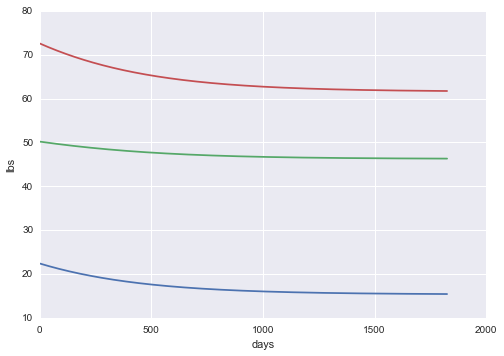

In [7]:
total_time = 5 * 365
h = 1.
y0 = np.array([F0, L0])
results = RK4(ode_wrapper, y0, 0, total_time, h, display=True)

n = int((total_time-0)/h) + 1
x = np.linspace(0,total_time,n)
plt.plot(x, np.sum(results,axis=1))
plt.xlabel('days')
plt.ylabel('lbs')

plt.show()

### Problem 2

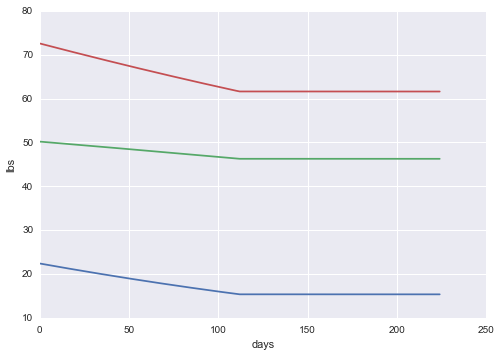

In [8]:
first_half, second_half = 16*7, 32*7
total_time = 32*7
EI_1, PAL_1 = 1600, 1.7
EI_2, PAL_2 = 2025, 1.5
h = 1.
y0 = np.array([F0, L0])

def prob2_ode(t, y):
    if t < 112:
        return weight_odesystem(t, y, EI=EI_1, PAL=PAL_1)
    else:
        return weight_odesystem(t, y, EI=EI_2, PAL=PAL_2)


results = RK4(prob2_ode, y0, 0, total_time, h, display=True)

n = int((total_time-0)/h) + 1
x = np.linspace(0,total_time,n)
plt.plot(x, np.sum(results,axis=1))
plt.xlabel('days')
plt.ylabel('lbs')
plt.show()

### Problem 3

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


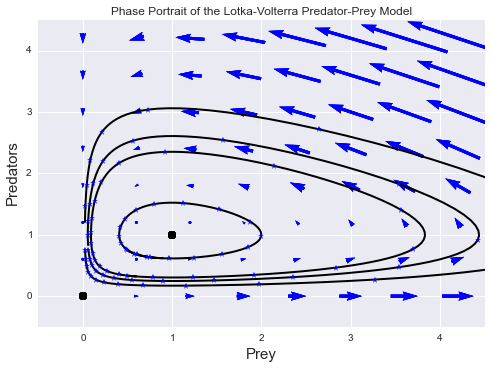

In [9]:
from scipy.integrate import odeint
a, b = 0., 13. # (Nondimensional) Time interval for one period
alpha = 1. / 3 # Nondimensional parameter
dim = 2 # dimension of the system
y = np.array([[1 / 2., 1 / 3.],[.5, .75], [1./16, .75], [1./40, .75]]) # initial conditions
# Note: swapping order of arguments to match the calling convention
# used in the built in IVP solver.
for y0 in y:
    def Lotka_Volterra(y, x):
        return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])

    subintervals = 200
    # Using the built in ode solver
    Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))
    # Plot the direction field
    Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
    U, V = Lotka_Volterra((Y1, Y2), 0)
    Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
    # Plot the 2 Equilibrium points
    plt.plot(1, 1, 'ok', markersize=8)
    plt.plot(0, 0, 'ok', markersize=8)
    # Plot the solution in phase space
    plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0)
    plt.plot(Y[::10,0], Y[::10,1], '*b')
    plt.axis([-.5, 4.5, -.5, 4.5])
    plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
    plt.xlabel('Prey', fontsize=15)
    plt.ylabel('Predators', fontsize=15)
plt.show()

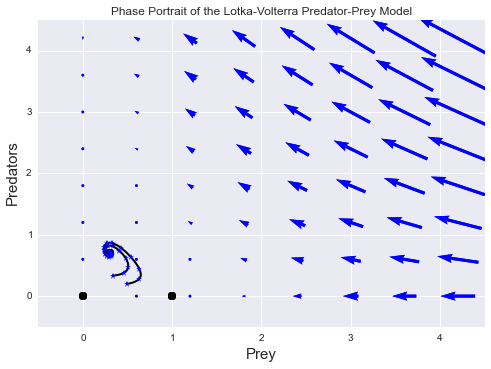

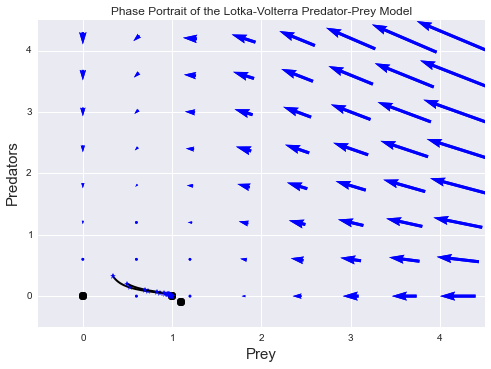

In [10]:
a, b = 0., 25.                    # (Nondimensional) Time interval for one'
dim = 2                           # dimension of the system
y = np.array([[1 / 3, 1 / 3.],[1/2, 1/5]])

def Lotka_Volterra(y, x):
    return np.array([y[0] * (1. - y[0] - y[1]), 
                     alpha* y[1] * (y[0] - beta)])

for param in [[1, 0.3], [1, 1.1]]:
    alpha, beta = param[0], param[1]
    for y0 in y:
        si = 200
        Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, si))
        Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
        U, V = Lotka_Volterra((Y1, Y2), 0)

        Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3],  U[::3, ::3],  V[::3, ::3],
               pivot='mid', color='b', units='dots', width=3.)
        plt.plot(beta,1-beta,'ok', markersize=8)
        plt.plot(1, 0,'ok', markersize=8)
        plt.plot(0, 0,'ok', markersize=8)

        plt.plot(Y[:,0], Y[:,1],'-k', linewidth=2.0)
        plt.plot(Y[::10,0], Y[::10,1],'*b')

        plt.axis([-.5, 4.5, -.5, 4.5])
        plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
        plt.xlabel('Prey',fontsize=15)
        plt.ylabel('Predators',fontsize=15)
    plt.show()